In [13]:
from pathlib import Path
from zipfile import ZipFile
import requests

URL="https://www.kaggle.com/api/v1/datasets/download/yasserh/titanic-dataset"
TITANIC_ZIP = "titanic.zip"
titanic_path = Path(TITANIC_ZIP)
if not titanic_path.exists():
    data = requests.get(URL)
    with open(TITANIC_ZIP,"wb") as f:
        f.write(data.content)
    with open(TITANIC_ZIP, 'rb') as f:
        ZipFile(f).extractall()
    print('Bestand is gedownload en uitgepakt')
else:
    print('Bestand bestaat al')




Bestand bestaat al


## Lees de data

In [14]:
import pandas as pd
TITANIC_CSV = "Titanic-Dataset.csv"
df = pd.read_csv(TITANIC_CSV)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Filter de kolommen
We zijn alleen geïnteresseerd in Survived, Sex, Pclass en Age

In [15]:
df = df[['Survived', 'Sex', 'Pclass', 'Age']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Pclass    891 non-null    int64  
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


## Sex is een category

In [16]:
df['Sex'] = df.Sex.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 22.0 KB


## Survived is een boolean

In [17]:
df['Survived'] = df.Survived.astype(pd.BooleanDtype())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    boolean 
 1   Sex       891 non-null    category
 2   Pclass    891 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 16.8 KB


## Alleen bekende leeftijden overhouden


In [18]:
# !! Overslaan voorlopig want we doen toch niets met Age momenteel en zouden anders mogelijks gecoreleerde data missen in de andere cols
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  714 non-null    boolean 
 1   Sex       714 non-null    category
 2   Pclass    714 non-null    int64   
 3   Age       714 non-null    float64 
dtypes: boolean(1), category(1), float64(1), int64(1)
memory usage: 18.9 KB


## Bereken de aantallen overlevenden/niet-overlevenden per klasse

In [19]:
per_Pclass = df.groupby(['Pclass', 'Survived']).size().unstack() #zet Pclass als index
per_Pclass

Survived,False,True
Pclass,,
1,64,122
2,90,83
3,270,85


## Bereken de percentages

In [20]:
percentages = per_Pclass.div(per_Pclass.sum(axis=1), axis=0) * 100
percentages

Survived,False,True
Pclass,,
1,34.408602,65.591398
2,52.023121,47.976879
3,76.056338,23.943662


## Plot de overlevingskans per klasse

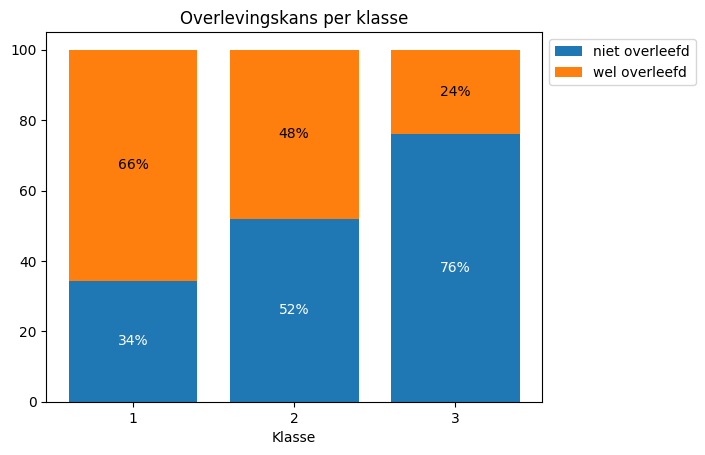

In [21]:
import matplotlib.pyplot as plt

bar = plt.bar(percentages.index, percentages.iloc[:, 0], label='niet overleefd') # of .loc[:, False] voor de duidelijkheid
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center', color='white')
bar = plt.bar(percentages.index, percentages.iloc[:, 1], bottom=percentages.iloc[:, 0], label='wel overleefd') # of .loc[:, True]. Moet beginnen bovenop de vorige bar
plt.gca().bar_label(bar, fmt='{:,.0f}%', label_type='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse')
plt.xticks(per_Pclass.index)
plt.show()

# Verdeling leeftijd-overleefd per klasse en per geslacht
Maak de onderstaande grafiek. Je mag de hulp inroepen van ChatGPT. Maar beschrijf zelf in markdown cellen wat elke stap doet (vraag geen bijkomende uitleg aan ChatGPT). Dat wil zeggen dat je de documentatie zult moeten opzoeken voor elke functie die ChatGPT gebruikt en die je niet kent. 

In [38]:
per_Pclass_Sex = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()
per_Pclass_Sex

C:\Users\Jef\AppData\Local\Temp\ipykernel_2768\1357699317.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_Pclass_Sex = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack()


Survived       False  True 
Pclass Sex                 
1      female      3     82
       male       61     40
2      female      6     68
       male       84     15
3      female     55     47
       male      215     38

Zelfde als eerder: aantal overlevenden per klasse, nu ook extra per geslacht.

In [39]:
percentages_class_Sex = per_Pclass_Sex.div(per_Pclass_Sex.sum(axis=1), axis=0) * 100
percentages_class_Sex

Survived           False      True 
Pclass Sex                         
1      female   3.529412  96.470588
       male    60.396040  39.603960
2      female   8.108108  91.891892
       male    84.848485  15.151515
3      female  53.921569  46.078431
       male    84.980237  15.019763

Zelfde als eerder: aantal omrekenen naar percentages tov het geheel.

In [40]:
import numpy as np

classes = sorted(df['Pclass'].unique()) # per klasse plotten, dus x-as is per klasse, in ascending order (1,2,3)
x = np.arange(len(classes))

bar_width = 0.35
offset = bar_width / 2 # Om de bars naast elkaar te plaatsen, elk helft van de breedte van een bar. Links = -offset, rechts = +offset

Om de bars per geslacht samen te krijgen, moeten we per klasse (classes), een offset schrijven zodat de bars per geslacht elk de helft van de breedte van een bar per klasse vormen. Links = -offset, rechts = +offset.
Die offset wordt dan gebruikt als positie op de x-axis wanneer we de bars plotten.

In [41]:
colors = {
    'male': {
        False: '#D22B2B', 
        True:  '#009E60'  
    },
    'female': {
        False: '#FAA0A0',
        True:  '#98FB98'
    }
}

kleurmap opgeven ter gebruik in de loop als vervanging van de standaardkleuren

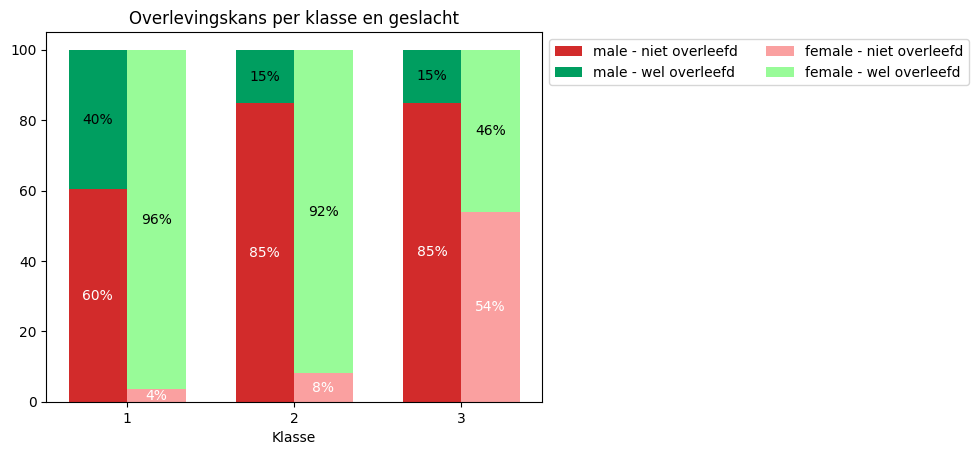

In [49]:
# 1. Plot bars
for sex in ['male', 'female']:
    data = percentages_class_Sex.loc[(slice(None), sex), :]
    data = percentages_class_Sex.xs(sex, level='Sex')
    #data.index = data.index.droplevel(1)

    xpos = x + (-offset if sex == 'male' else offset)

    bar1 = plt.bar(
        xpos,
        data[False],
        width=bar_width,
        color=colors[sex][False],
        label=f'{sex} - niet overleefd'
    )

    bar2 = plt.bar(
        xpos,
        data[True],
        bottom=data[False],
        width=bar_width,
        color=colors[sex][True],
        label=f'{sex} - wel overleefd'
    )

    plt.bar_label(bar1, fmt='{:,.0f}%', label_type='center', color='white')
    plt.bar_label(bar2, fmt='{:,.0f}%', label_type='center')


# 2. Final polish
plt.xticks(x, classes)
plt.xlabel('Klasse')
plt.title('Overlevingskans per klasse en geslacht')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncols=2)


# 3. Render the figure
plt.show()

### Stappen voor bovenstaand plotten:

1. for sex in ['male', 'female']:.

ittereren over geslacht (male-female), aangezien we per klasse de opsplitsing maken.

2. data = percentages_class_Sex.loc[(slice(None), sex), :].

Data die we gebruiken voor de bars: voor percentages_class_Sex locaten we per geslacht, multi index (met slice(None) betekent alles), alle kollomen (overleefd of niet).

3. data.index = data.index.droplevel(1).

Sex is nog onderdeel van de index, en om te plotten, moeten we enkelvoudige hebben, dus: drop 'Sex' uit index.

4. xpos = x + (-offset if sex == 'male' else offset).

Om de bars naast/aan elkaar te plaatsen, elk helft van de breedte van een bar. Links = -offset, rechts = +offset. Ter gebruik per bar(per klasse).

5. bar1 en bar2.

We geven mee: xpos (naast elkaar, links/rechts), data=False betekent 'survived = False' en width, color, label spreken voor zich.

6. bar labels toevoegen zoals in het voorbeeld.

We geven mee: plt.bar_label(welke bar, fmt= voor hoe te schrijven (afgerond en %), label_type= waar te zetten, color='white' voor leesbaarheid, black default)

7. final polish.

De xticks per klasse enkel labelen, een x-axis label meegeven, een figuur titel meegeven, de legende's linker bovenhoek rechtboven op de figuur plaatsen (op 1,1)


In [27]:
# afblijven